# Problem Statement
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science projectis to build a predictive model and find out the sales of each product at a particular store. Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

# Hypothesis Generation
1.Location of the store affects the sales: Stores located within popular marketplaces should have higher sales because of better access to customers.

2.Store size affects the sales:Stores which are very big in size should have higher sales as they act like one-stop-shops and people would prefer getting everything from one place

3.Utility: Daily use products should have a higher tendency to sell as compared to the specific use products.

4.Visibility in Store: The location of product in a store will impact sales. Ones which are right at entrance will catch the eye of customer first rather than the ones in back.

5.Display Area: Products which are given bigger shelves in the store are likely to catch attention first and sell more.

# Loading Packages and Data

In [22]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os
os.chdir('C:/Users/HP/Desktop/CHELSI/Technocolabs')
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
train['source']='train'
test['source']='test'
train.columns
test.columns
test['Item_Outlet_Sales'] = 0
data = pd.concat([train, test],ignore_index=True)

# Data Structure and Content

In [23]:
train.shape, test.shape, data.shape

((8523, 13), (5681, 13), (14204, 13))

In [24]:
'''Check which are numerical variables'''
numeric_features = data.select_dtypes(include=[np.number])
numeric_features.dtypes

Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
dtype: object

In [25]:
'''Check which are categorical variables'''
categorial_features = data.select_dtypes(include=[np.object])
categorial_features.dtypes

Item_Identifier         object
Item_Fat_Content        object
Item_Type               object
Outlet_Identifier       object
Outlet_Size             object
Outlet_Location_Type    object
Outlet_Type             object
source                  object
dtype: object

In [26]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.792854,0.065953,141.004977,1997.830681,1308.865489
std,4.652502,0.051459,62.086938,8.371664,1699.791423
min,4.555000,0.000000,31.290000,1985.000000,0.000000
25%,8.710000,0.027036,94.012000,1987.000000,0.000000
50%,12.600000,0.054021,142.247000,1999.000000,559.272000
75%,16.750000,0.094037,185.855600,2004.000000,2163.184200
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [27]:
data.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
source                          0
dtype: int64

In [28]:
data.apply(lambda x: len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
source                           2
dtype: int64

# Univariate Analysis

Target Variable

Setup Complete


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Outlet_Sales'>

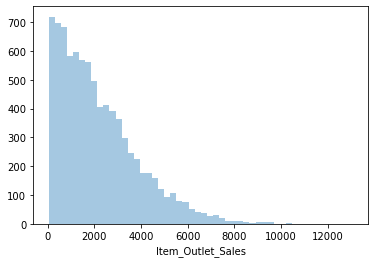

In [29]:
#Item_Outlet_Sales 
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")
sns.distplot(a=train['Item_Outlet_Sales'], kde=False)

In [30]:
conti = ['Item_Weight', 'Item_Visibility','Item_MRP']
categ = ['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Establishment_Year',
         'Outlet_Size', 'Outlet_Location_Type','Outlet_Type']
target = ['Item_Outlet_Sales']

In [31]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas

Numerical Variables

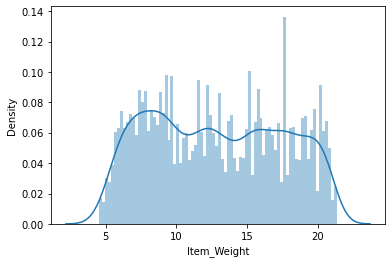

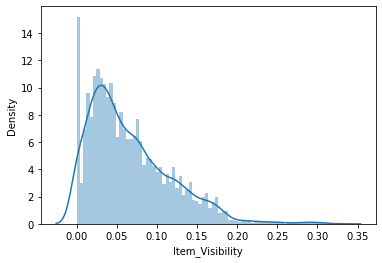

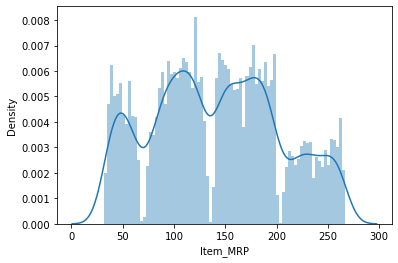

In [32]:
for col in conti:
    sns.distplot(train[col].dropna(), bins=80)
    plt.show()

Categorical Variables

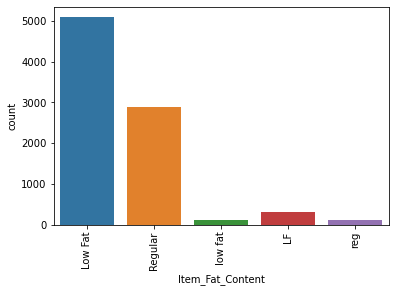

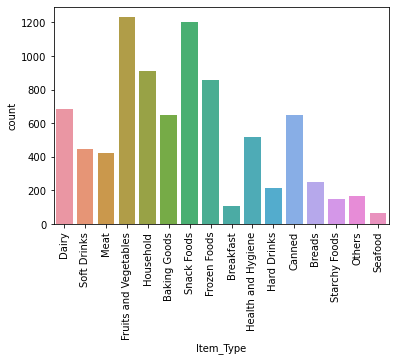

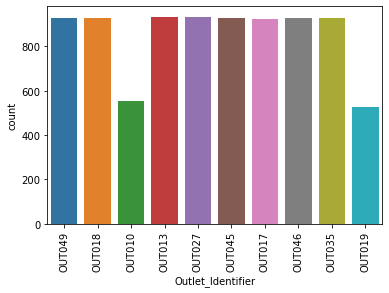

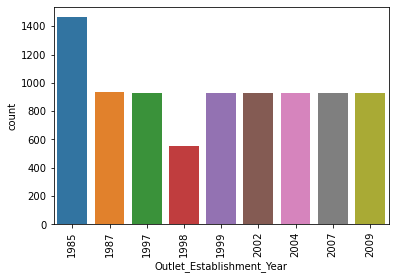

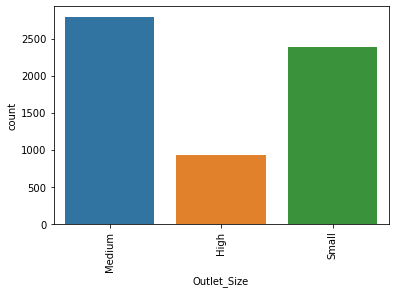

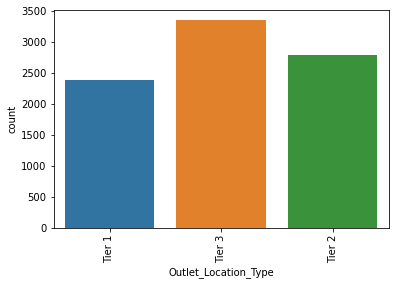

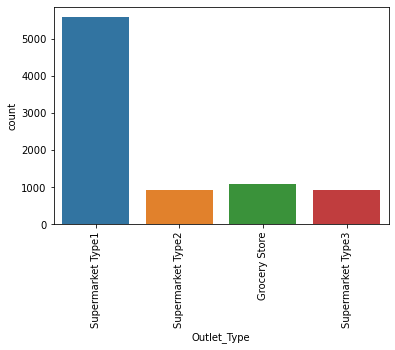

In [33]:
for col in categ:
    sns.countplot(train[col])
    plt.xticks(rotation = 90)
    plt.show()

# Bivariate Analysis

Numerical Variables and Item_Outlet_Sales

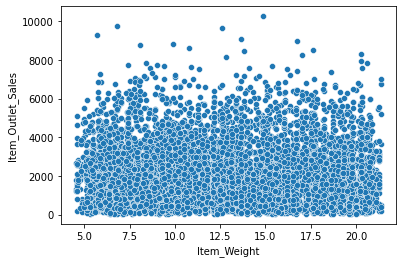

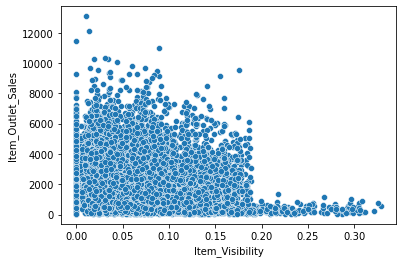

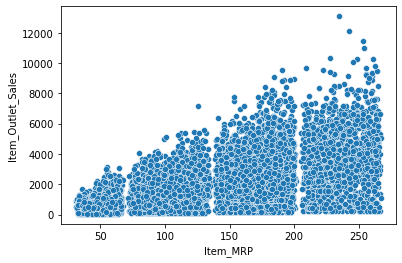

In [34]:
for cols in conti:
    sns.scatterplot(x = train[cols], y = train['Item_Outlet_Sales'])
    plt.show()

Categorical Variables and Item_Outlet_Sales

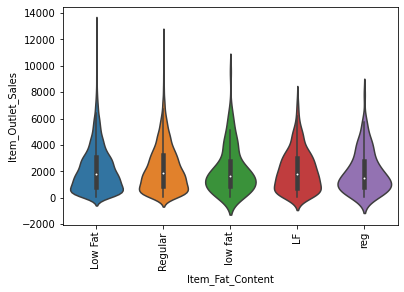

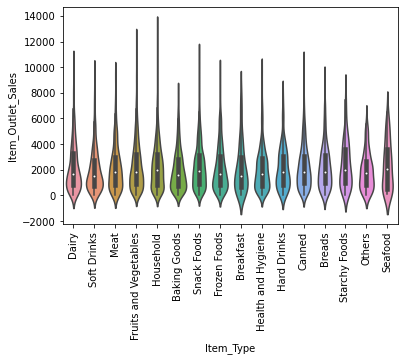

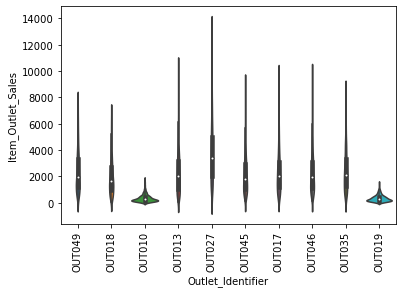

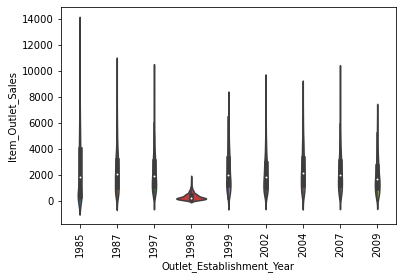

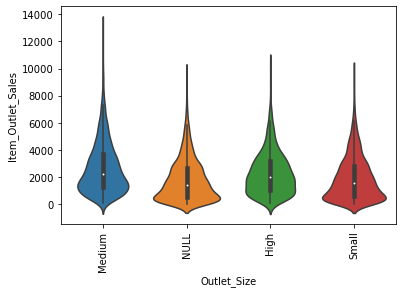

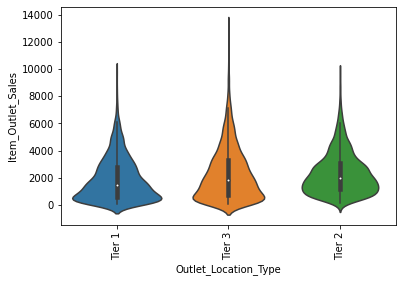

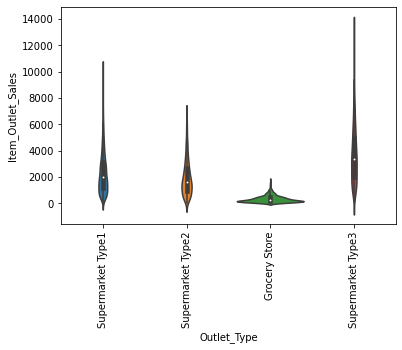

In [35]:
for cols in categ:
    sns.violinplot(x = train[cols].fillna('NULL'), y = train['Item_Outlet_Sales'])
    plt.xticks(rotation = 90)
    plt.show()

# Missing Value Treatment

In [36]:
'Imputing Item_Weight missing values'
data['Item_Weight']=data['Item_Weight'].fillna(data.groupby('Item_Identifier')['Item_Weight'].transform('mean'))
data.isnull().sum()

'List of item types'
item_type_list = data.Item_Type.unique().tolist()

'grouping based on item type and calculating mean of item weight'
Item_Type_Means = data.groupby('Item_Type')['Item_Weight'].mean()

'Mapiing Item weight to item type mean'
for i in item_type_list:
    dic = {i:Item_Type_Means[i]}
    s = data.Item_Type.map(dic)
    data.Item_Weight = data.Item_Weight.combine_first(s)
    
Item_Type_Means = data.groupby('Item_Type')['Item_Weight'].mean()

'Checking if Imputation was successful'
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
source                          0
dtype: int64

In [37]:
'Imputing Outlet_Size missing values'
def impute_size(cols):
    size = cols[0]
    ot_type = cols[1]
    if pd.isnull(size):
        if ot_type == "Supermarket Type1":
            return "Small"
        elif ot_type == "Supermarket Type2":
            return "Medium"
        elif ot_type == "Grocery Store":
            return "Small"
        elif ot_type == "Supermarket Type3":
            return "Medium"
    return size  
data["Outlet_Size"] = data[["Outlet_Size","Outlet_Type"]].apply(impute_size, axis = 1)

'Checking if Imputation was successful'
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
source                       0
dtype: int64

# Feature Engineering

In [38]:
#Modify Item_Visibility
'Determine average visibility of a product'
visibility_avg = data.pivot_table(values='Item_Visibility', index='Item_Identifier')

'Impute 0 values with mean visibility of that product'
missing_values = (data['Item_Visibility'] == 0)

print ('Number of 0 values initially: %d'%sum(missing_values))
data.loc[missing_values,'Item_Visibility'] = data.loc[missing_values,'Item_Identifier'].apply(lambda x: visibility_avg.at[x, 'Item_Visibility'])
print ('Number of 0 values after modification: %d'%sum(data['Item_Visibility'] == 0))

Number of 0 values initially: 879
Number of 0 values after modification: 0


In [39]:
#Modify categories of Item_Fat_Content
data['Item_Fat_Content'] =data['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})
data['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [40]:
# Determine the years of operation of a store
data.index = data['Outlet_Establishment_Year']
data.index

df = data.loc[:,['Item_Outlet_Sales']]
df.head(2)
data['Outlet_Years'] = 2009 - data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

count    14204.000000
mean        11.169319
std          8.371664
min          0.000000
25%          5.000000
50%         10.000000
75%         22.000000
max         24.000000
Name: Outlet_Years, dtype: float64

In [41]:
# Combining Item_Type
#Get the first two characters of ID:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food',
                                                         'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

# Label Encoding

In [42]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
data.apply(LabelEncoder().fit_transform)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Years,Item_Type_Combined
Outlet_Establishment_Year,,,,,,,,,,,,,,,
1999,156,422,0,1163,4,7567,9,4,1,0,1,2541,1,4,1
2009,8,78,1,1534,14,632,3,8,1,2,2,423,1,0,0
1999,662,572,0,1246,10,3897,9,4,1,0,1,1640,1,4,1
1998,1121,596,1,1376,6,5626,0,3,2,2,0,671,1,5,1
1987,1297,397,0,336,9,848,1,1,0,2,1,866,1,7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1997,233,443,1,765,13,3881,8,2,2,0,1,0,0,6,1
2009,308,279,1,12464,15,5069,3,8,1,2,2,0,0,0,1
2002,1426,435,0,8450,8,3196,7,5,2,1,1,0,0,3,2


# One hot encoding

In [43]:
data = pd.get_dummies(data)
print(data.shape)

(14204, 1608)


# Modeling

In [44]:
x=data.drop(['Item_Outlet_Sales'],axis=1)
y=data['Item_Outlet_Sales']
print(x.shape)
print(y.shape)

(14204, 1607)
(14204,)


In [45]:
'Splitting the dataset into train and test'
train = data.iloc[:8523,:]
test = data.iloc[8523:,:]
print(train.shape)
print(test.shape)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

(8523, 1608)
(5681, 1608)


# Linear Regression

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [47]:
'predicting the  test set results'
y_pred = model.predict(x_test)
print(y_pred)

[-1424.  1744.  2160. ...  1552.  -400.  -688.]


In [48]:
'finding the mean squared error and variance'
mse = mean_squared_error(y_test, y_pred)
print('RMSE :', np.sqrt(mse))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

RMSE : 1175.6145345132668
Variance score: 0.54


# Regularized Linear Regression

Lasso Regression

In [49]:
from sklearn.linear_model import Lasso  
lassoReg = Lasso(alpha=0.01, normalize=True)  
lassoReg.fit(x_train,y_train)  
pred = lassoReg.predict(x_test)  

In [50]:
'finding the mean squared error and variance'
mse = mean_squared_error(y_test, y_pred)
print('RMSE :', np.sqrt(mse))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

RMSE : 1175.6145345132668
Variance score: 0.54


Ridge Regression

In [51]:
from sklearn.linear_model import Ridge  
## training the model  
ridgeReg = Ridge(alpha=0.05, normalize=True)  
ridgeReg.fit(x_train, y_train)  
y_pred = ridgeReg.predict(x_test)  

In [52]:
'finding the mean squared error and variance'
mse = mean_squared_error(y_test, y_pred)
print('RMSE :', np.sqrt(mse))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

RMSE : 1169.571331679481
Variance score: 0.55


# RandomForest

In [53]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators = 100 , n_jobs = -1)
model.fit(x_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [54]:
'predicting the  test set results'
y_pred = model.predict(x_test)
print(y_pred)

[   0.       1738.210718 2811.779928 ... 1431.363472    0.
    0.      ]


In [55]:
'finding the mean squared error and variance'
mse = mean_squared_error(y_test, y_pred)
print("RMSE :",np.sqrt(mse))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

RMSE : 889.4178072644183
Variance score: 0.74


# XGBoost

In [57]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(x_train, y_train)

GradientBoostingRegressor()

In [58]:
'predicting the test set results'
y_pred = model.predict(x_test)
print(y_pred)

[ -69.06131776 2600.29140877 2043.77156582 ... 1520.41354564   47.75335644
   47.22071308]


In [59]:
'finding the mean squared error and variance'
mse = mean_squared_error(y_test, y_pred)
print("RMSE :",np.sqrt(mse))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

RMSE : 851.9198384252545
Variance score: 0.76


# Summary

The objective of this framework was to predict the future sales from given historical data using machine Learning techniques. Based on the accuracy predicted by different models XGboost technique gives the best score for model with RSME (838.4992). These predictions will help big marts to refine their methodologies and strategies which in turn helps them to increase their profit.